<a href="https://colab.research.google.com/github/atulm7348/My-codes-and-assingments/blob/main/hw_2_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(256, 256)


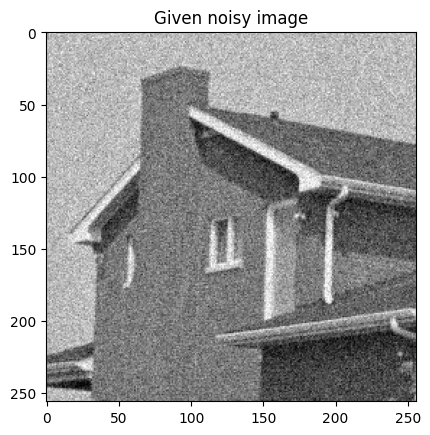

In [2]:
import numpy as np
import autograd.numpy as anp
from autograd import grad
import imageio.v3 as io
import matplotlib.pyplot as plt

img = io.imread("/content/noisy_house.jpg")
img = img / np.max(img)

if img.ndim == 3:
    img = img.mean(axis=-1)

def TV(a):
    ux, uy = anp.gradient(a)
    g = anp.sqrt(anp.abs(ux)**2 + anp.abs(uy)**2 + 1e-10)
    s = anp.sum(g[:])
    return s

def data_error(guess, blurred, h):
    G = anp.fft.fftshift(anp.fft.fft2(anp.fft.ifftshift(guess)))
    H = anp.fft.fftshift(anp.fft.fft2(anp.fft.ifftshift(h)))
    err = blurred - anp.real(anp.fft.fftshift(anp.fft.ifft2(anp.fft.ifftshift(G*H))))
    err2 = err**2
    l2err = anp.sum(err2[:])
    return l2err

print(img.shape)
plt.figure(1)
plt.imshow(img, cmap='gray')
plt.title('Given noisy image')
plt.show()

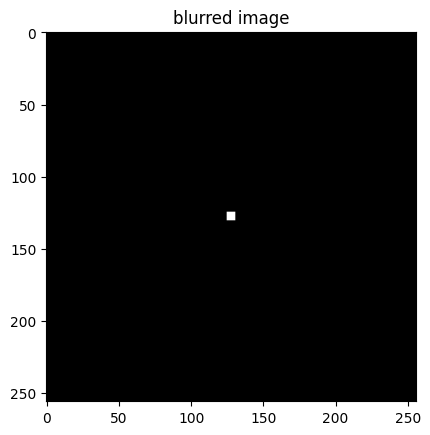

In [3]:
x0 = np.linspace(-127.5, 127.5, 256, endpoint=True)
x, y = np.meshgrid(x0,x0)

h = np.zeros((256,256))
h[(np.abs(x) < 3) * (np.abs(y) < 3)] = 1

h = h / np.sum(h[:])  #?

plt.figure(2)
plt.imshow(h, cmap='gray')
plt.title('blurred image')
plt.show()

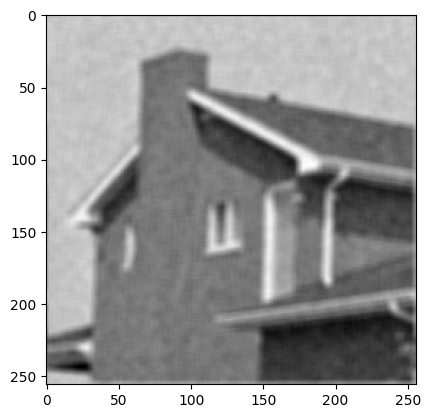

In [4]:
A = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(img)))
H = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(h)))
b = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(A*H))))

plt.figure(3)
plt.imshow(b, cmap='gray')
plt.show()

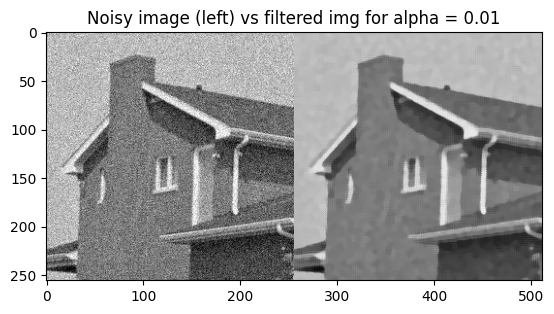

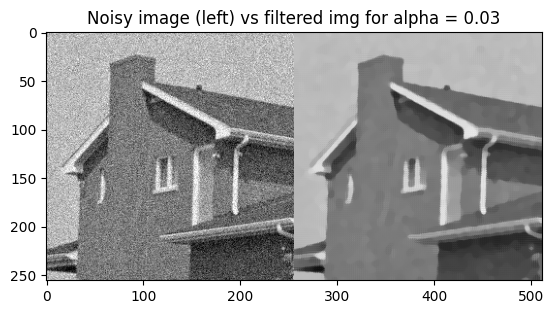

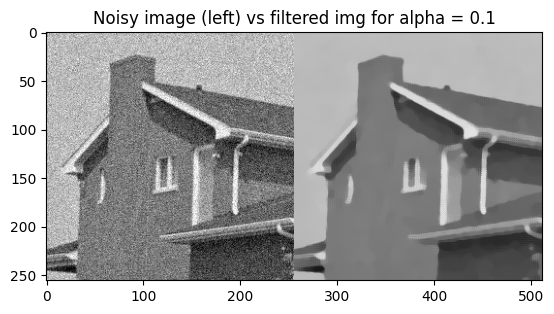

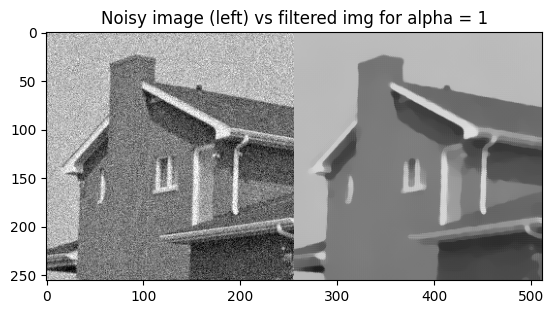

In [5]:

gerr = grad(data_error, 0)
gtv = grad(TV, 0)

alpha = [0.01, 0.03, 0.1, 1]

guess = img
t = 0.1

for i in alpha:

 for iter in np.arange(1,51,1):

    C1 = data_error(guess, b, h)
    dC1 = gerr(guess, b, h)
    C2 = TV(guess)
    dC2 = gtv(guess)
    C = C1 + i*C2
    dC = dC1 + i*dC2
    dC = dC / np.linalg.norm(dC)

    donet = 0

    while(not donet):
        guess_try = guess - t* np.linalg.norm(guess) * dC
        C1try = data_error(guess_try, b, h)
        C2try = TV(guess_try)
        Ctry = C1try + i*C2try

        if(Ctry < C):
            donet = 1
            guess = guess_try
        else:
            t = t/2

    if(t < 1e-6):
        break
    else:
        t = 0.1

    guess[guess<0] = 0

 plt.figure(5)
 plt.imshow(np.concatenate((img, guess), axis=1), cmap='gray')
 plt.title('Noisy image (left) vs filtered img for alpha = ' +str(i))
 plt.show()

**Above result shown for different weight (alpha) values of TV, after 50 iterations, we noticed that when values of alpha increase from 0.01 to 1, image become more smoother but a optimal image can be consider by the looking denoised images is between alpha = 0.01 to alpha = 1 .**              
.